EDA ON CRONIC DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option('display.max_columns',30)

In [4]:
df = pd.read_csv("kidney_disease.csv")

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [8]:
df.id

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

In [9]:
df.drop(['id'],axis = 1 ,inplace = True)#Id col doesn't have any pattern

In [10]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells'
    , 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
    'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
    'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']

In [13]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [15]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [16]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume,errors = 'coerce') #if there is null it ignores it
#suprasing the null values

In [17]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [18]:
df['white_blood_cell_count']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

In [19]:
#df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float,errors = 'ignore')

In [20]:
df['white_blood_cell_count'] = pd.to_numeric(df.white_blood_cell_count,errors = 'coerce')

In [21]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [22]:
df['red_blood_cell_count'] = pd.to_numeric(df.red_blood_cell_count,errors = 'coerce')

In [23]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

In [24]:
cat_col = [col for col in df.columns if df[col].dtype=='object']

In [25]:
num_col = [col for col in df.columns if df[col].dtype!='object']

In [26]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'classification']

In [27]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [28]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values. \n")

red_blood_cells has [nan 'normal' 'abnormal'] values. 

pus_cell has ['normal' 'abnormal' nan] values. 

pus_cell_clumps has ['notpresent' 'present' nan] values. 

bacteria has ['notpresent' 'present' nan] values. 

hypertension has ['yes' 'no' nan] values. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values. 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values. 

appetite has ['good' 'poor' nan] values. 

pedal_edema has ['no' 'yes' nan] values. 

anemia has ['no' 'yes' nan] values. 

classification has ['ckd' 'ckd\t' 'notckd'] values. 



In [29]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes': 'yes',' yes':'yes'},inplace = True)

In [30]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values. \n")

red_blood_cells has [nan 'normal' 'abnormal'] values. 

pus_cell has ['normal' 'abnormal' nan] values. 

pus_cell_clumps has ['notpresent' 'present' nan] values. 

bacteria has ['notpresent' 'present' nan] values. 

hypertension has ['yes' 'no' nan] values. 

diabetes_mellitus has ['yes' 'no' nan] values. 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values. 

appetite has ['good' 'poor' nan] values. 

pedal_edema has ['no' 'yes' nan] values. 

anemia has ['no' 'yes' nan] values. 

classification has ['ckd' 'ckd\t' 'notckd'] values. 



In [31]:
df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'},inplace = True)
#df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno' ,value = 'no')

In [32]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values. \n")

red_blood_cells has [nan 'normal' 'abnormal'] values. 

pus_cell has ['normal' 'abnormal' nan] values. 

pus_cell_clumps has ['notpresent' 'present' nan] values. 

bacteria has ['notpresent' 'present' nan] values. 

hypertension has ['yes' 'no' nan] values. 

diabetes_mellitus has ['yes' 'no' nan] values. 

coronary_artery_disease has ['no' 'yes' nan] values. 

appetite has ['good' 'poor' nan] values. 

pedal_edema has ['no' 'yes' nan] values. 

anemia has ['no' 'yes' nan] values. 

classification has ['ckd' 'ckd\t' 'notckd'] values. 



In [33]:
#df['classification'] = df['classification'].replace(to_replace = 'ckd\t' ,value = 'ckt') #not chronic disease

In [34]:
df['classification'] = df['classification'].replace(to_replace = {'ckd\t':'ckd','notckd':'not ckd'})

In [35]:
df['classification'].unique()

array(['ckd', 'not ckd'], dtype=object)

In [36]:
df['classification'] = df['classification'].map({'ckd':1 ,'not ckd':0})

In [37]:
df['classification']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [38]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [39]:
df['age'].isnull().sum()

9

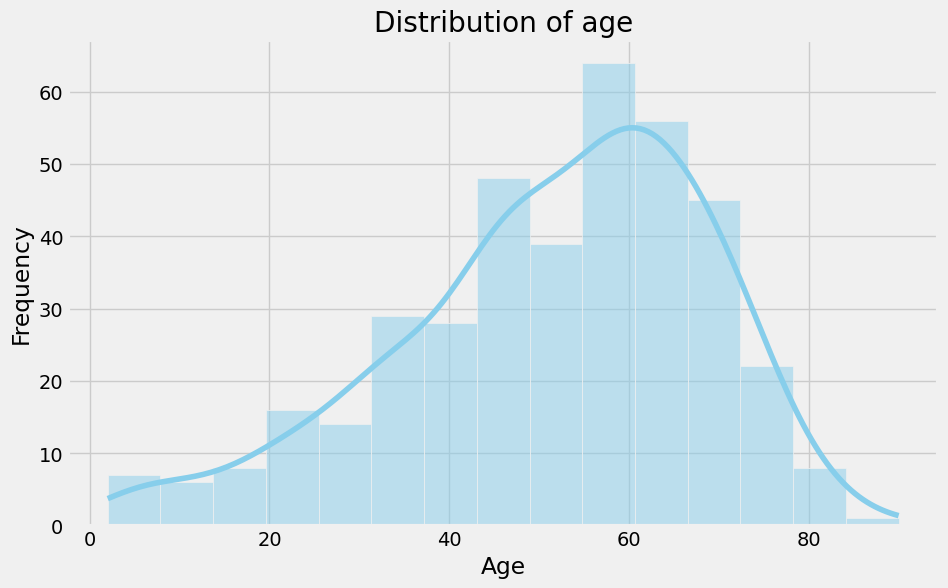

In [40]:
#Univariate analysis
plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde = True,color='skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [41]:
#Insights
#the mean age is around 50
#most of the people around 40 - 60
#70 - 80 low no of people
#this is not a normal dist littlbe bit skewed

In [42]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [43]:
df.hypertension

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

In [44]:
#How many people having cronic disease has hypertension

In [45]:
df['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [46]:
df['hypertension'].value_counts()

hypertension
no     251
yes    147
Name: count, dtype: int64

In [47]:
df_temp = df[df['classification'] == 1 ]

In [48]:
df_temp

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,103.0,79.0,5.3,135.0,6.3,6.3,19.0,7200.0,2.6,yes,no,yes,poor,no,no,1
246,48.0,110.0,1.015,3.0,0.0,abnormal,normal,present,notpresent,106.0,215.0,15.2,120.0,5.7,8.6,26.0,5000.0,2.5,yes,no,yes,good,no,yes,1
247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,150.0,18.0,1.2,140.0,4.2,NaN,NaN,NaN,NaN,no,no,no,poor,yes,yes,1
248,59.0,70.0,1.010,1.0,3.0,abnormal,abnormal,notpresent,notpresent,424.0,55.0,1.7,138.0,4.5,12.6,37.0,10200.0,4.1,yes,yes,yes,good,no,no,1


In [49]:
df_temp['hypertension'].value_counts()

hypertension
yes    147
no     103
Name: count, dtype: int64

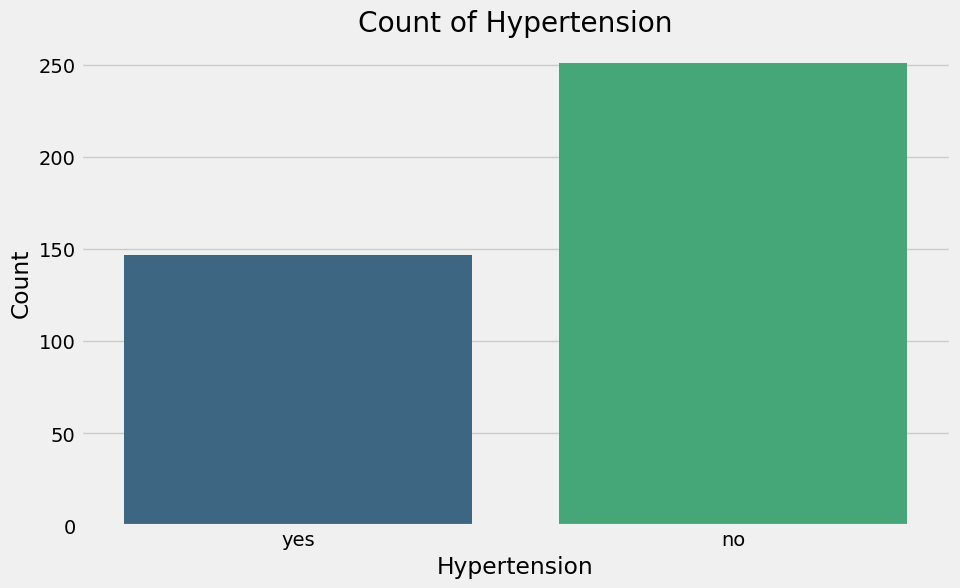

In [50]:
plt.figure(figsize = (10,6))
sns.countplot(x='hypertension',data = df ,palette ='viridis')
plt.title('Count of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

In [51]:
#148 people have hypertension and 250 have not hypertension  data is not equally distributed

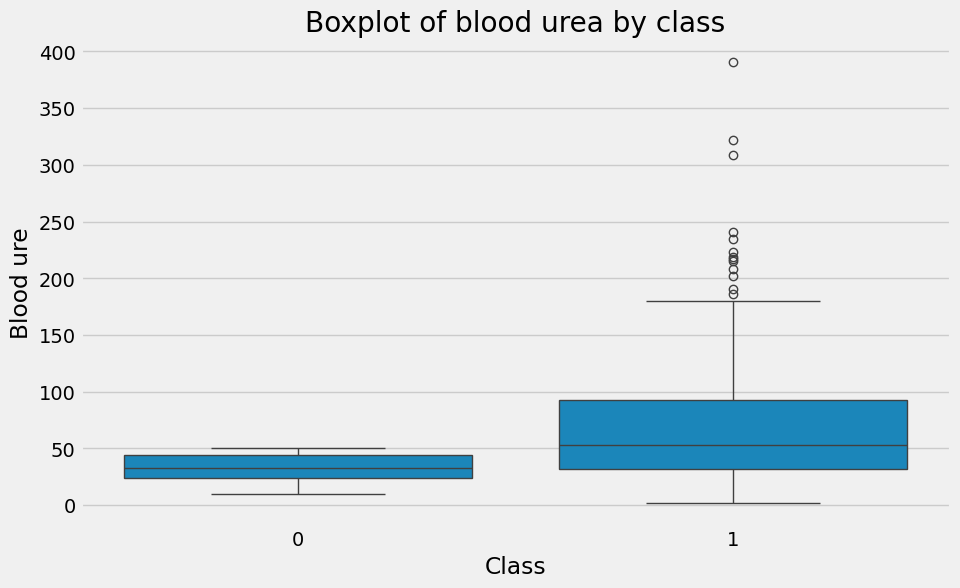

In [52]:
plt.figure(figsize= (10,6))
sns.boxplot(x = 'classification', y ='blood_urea',data =df)
plt.xlabel('Class')
plt.ylabel('Blood ure')
plt.title('Boxplot of blood urea by class')
plt.show()


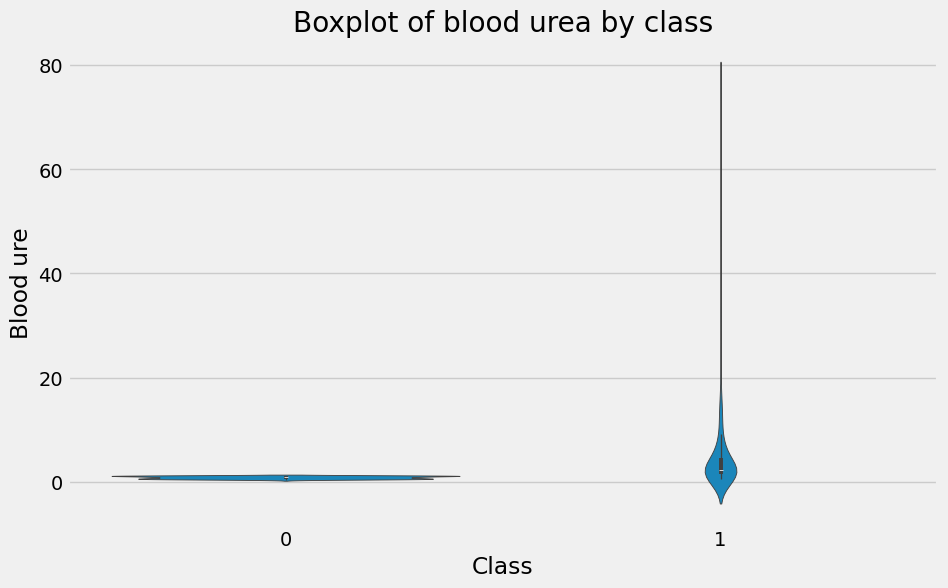

In [53]:
plt.figure(figsize= (10,6))
sns.violinplot(x = 'classification', y ='serum_creatinine',data =df)
plt.xlabel('Class')
plt.ylabel('Blood ure')
plt.title('Boxplot of blood urea by class')
plt.show()

<Axes: xlabel='anemia', ylabel='count'>

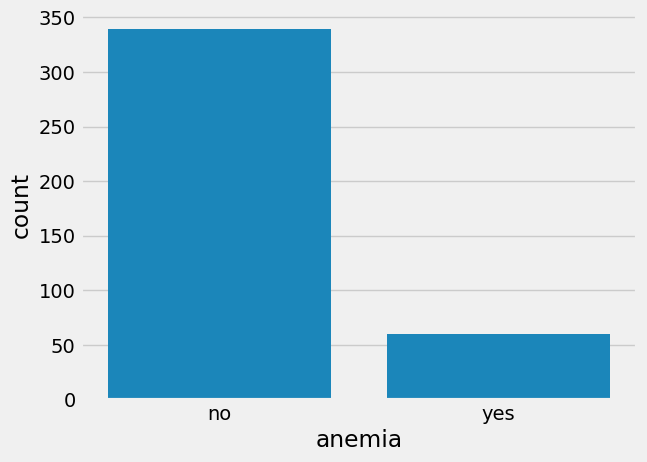

In [54]:
sns.countplot(x='anemia' ,data = df )

In [55]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [56]:
df.appetite

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

<Axes: ylabel='count'>

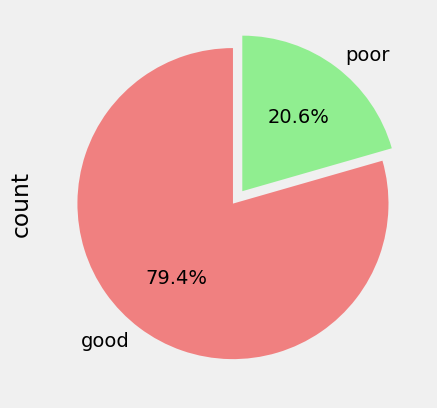

In [57]:
df['appetite'].value_counts().plot.pie(autopct ='%1.1f%%',colors=['lightcoral','lightgreen'],explode=(0,0.1),startangle=90)

In [58]:
#79.4 has good appetite
#20.6 has poor appetite

<Axes: ylabel='count'>

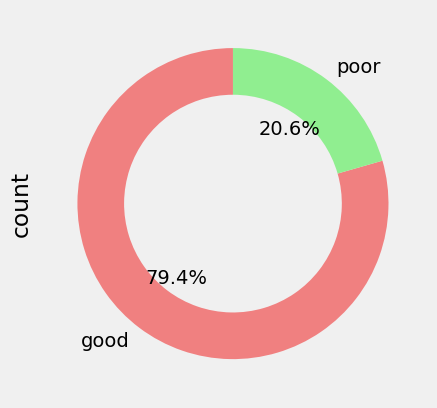

In [59]:
df['appetite'].value_counts().plot.pie(autopct ='%1.1f%%',colors=['lightcoral','lightgreen'],wedgeprops = dict(width=0.3),startangle = 90)

In [60]:
# how many ppl having hypertension with poor appitite?
#how many ppl having chronic disease and hypertension with poor appetite?

In [61]:
num_cols=df.columns

<Axes: xlabel='pedal_edema', ylabel='count'>

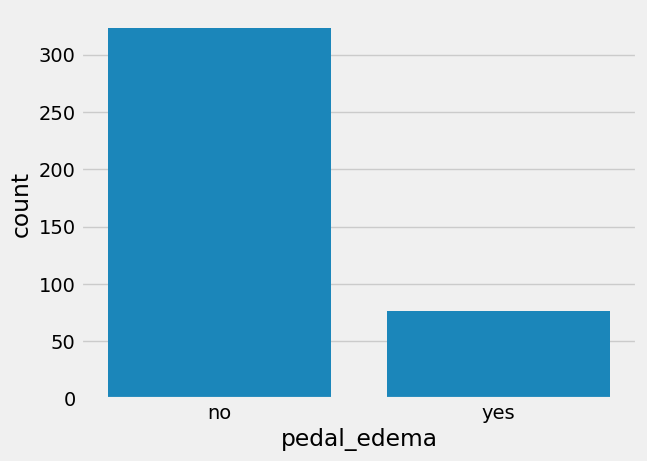

In [62]:
sns.countplot(x='pedal_edema',data = df)

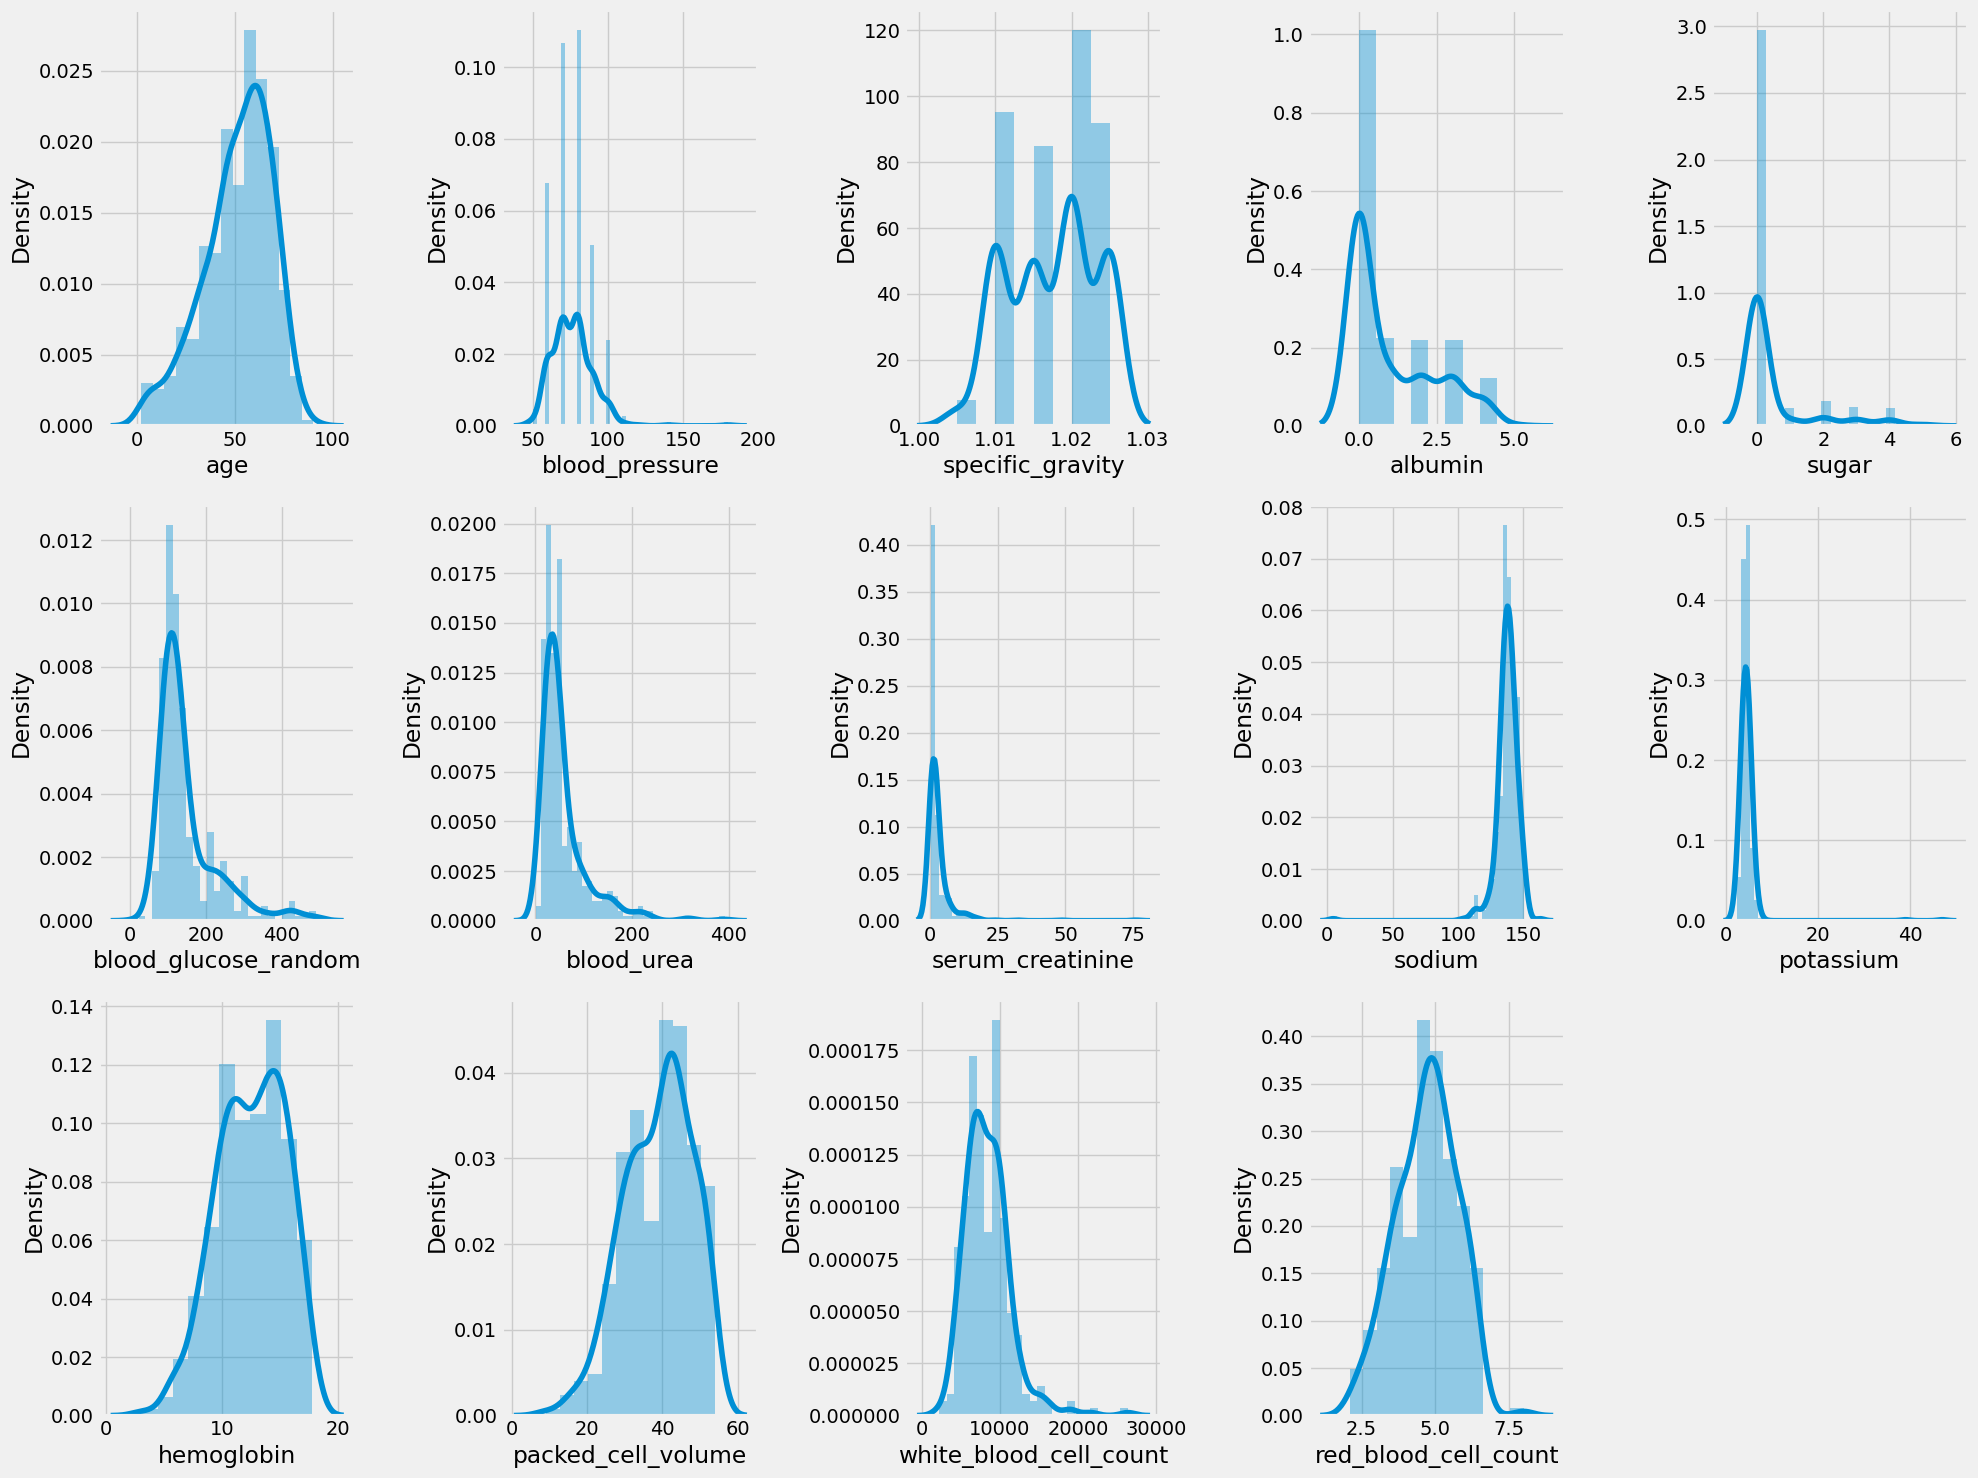

In [63]:
plt.figure(figsize = (20,15))
plotnumber = 1

for col in num_col:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [64]:
def kde(col):
    grid = sns.FacetGrid(df,hue='classification',height = 6 , aspect = 2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()


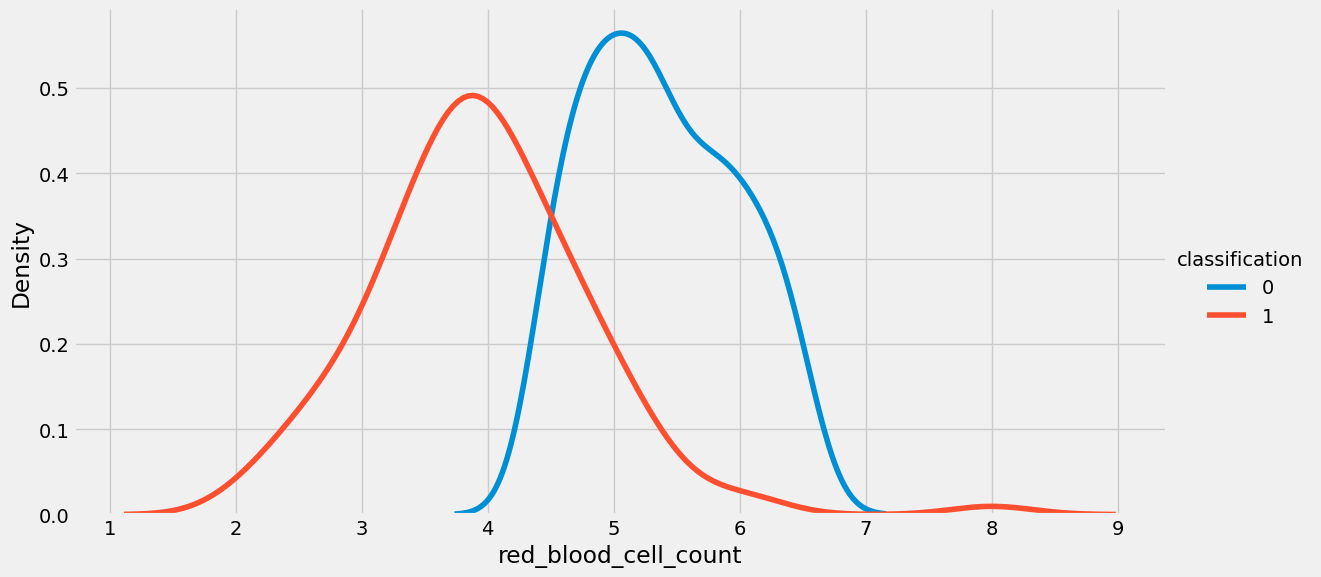

In [65]:
kde('red_blood_cell_count')

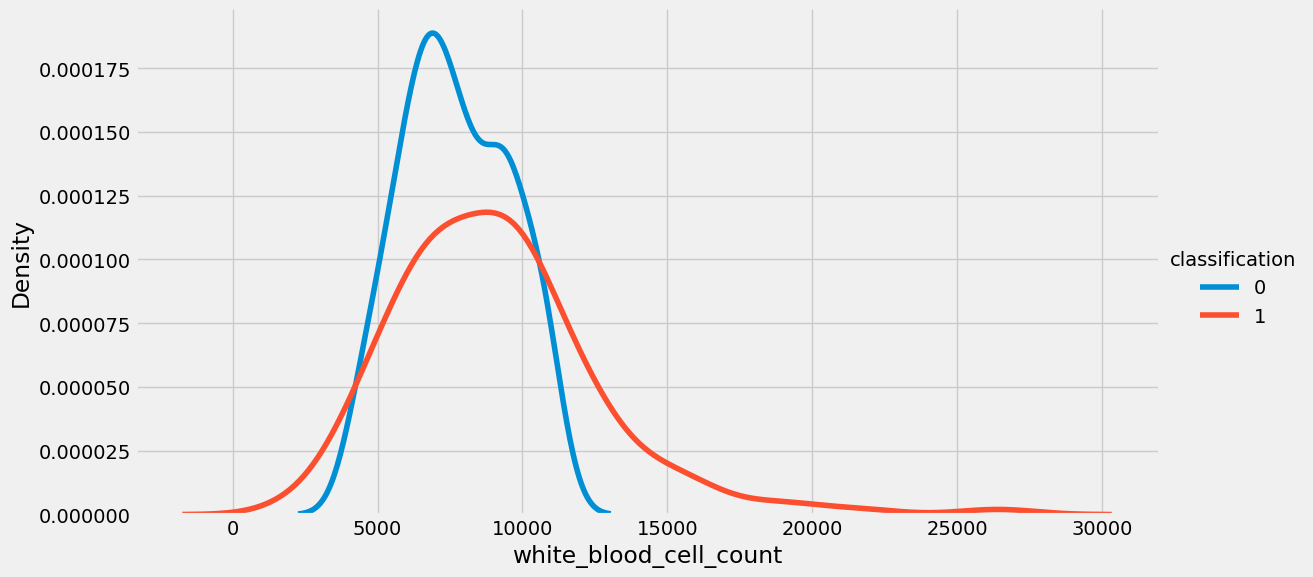

In [66]:
kde('white_blood_cell_count')

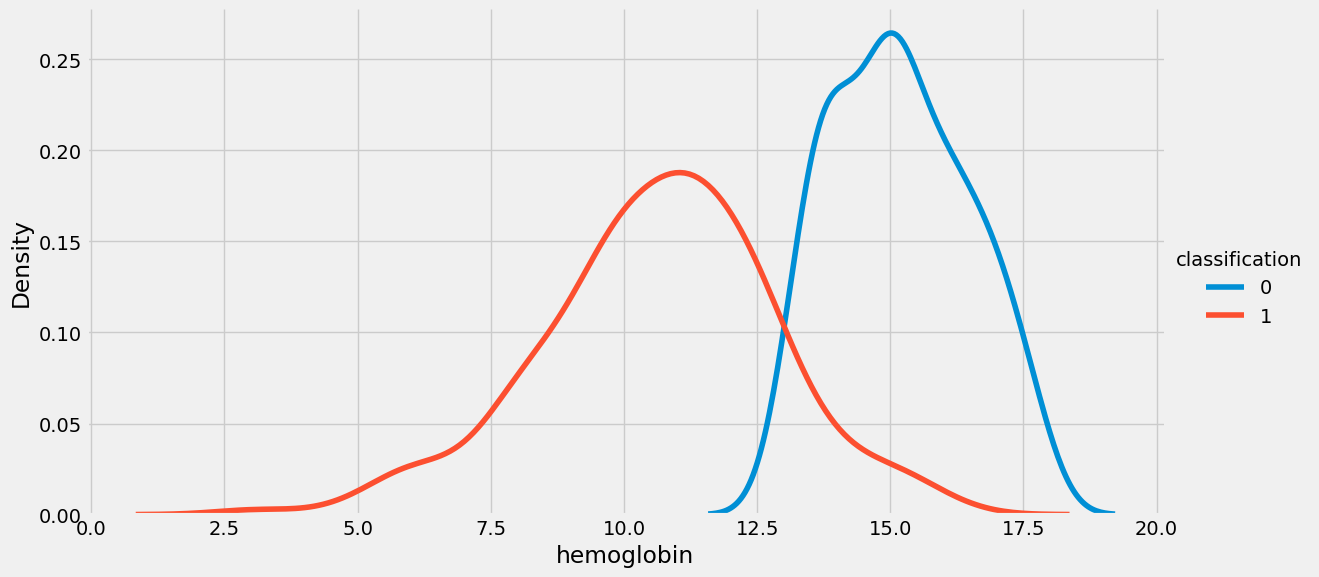

In [67]:
kde('hemoglobin')

In [68]:
def violin(col):
    fig=px.violin(df,y=col,x='classification',box=True,template ='plotly_dark')
    return fig.show()


In [69]:
violin('hemoglobin')

In [70]:
#insights>>outliers are present , 3.1, and 4.8 , 16.1, for class 1

In [71]:
violin('packed_cell_volume')

In [72]:
violin('specific_gravity')

<Axes: xlabel='age', ylabel='blood_pressure'>

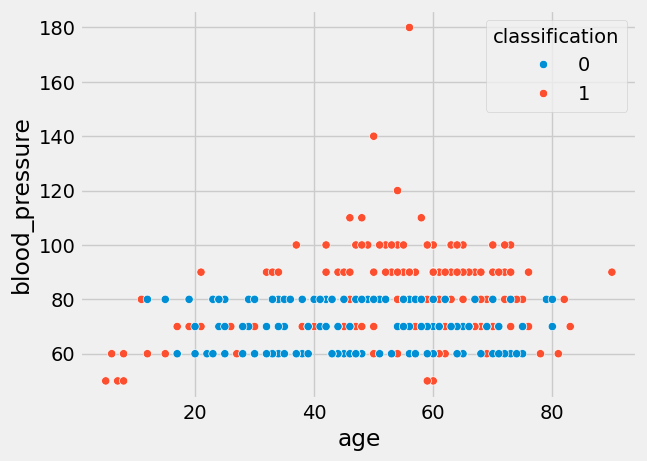

In [73]:
#bivariate
sns.scatterplot(x = 'age',y = 'blood_pressure',data = df, hue = 'classification')

In [74]:
fig = px.scatter(df, x='age', y='blood_pressure', color='classification')
fig.show()


In [75]:
#insights -->most of the people having chronic desease is having plood_pressure more than 100
#high bp causes chronic disease

In [76]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

Text(0.5, 1.0, 'stacked diabetes_mellitus and hypertension')

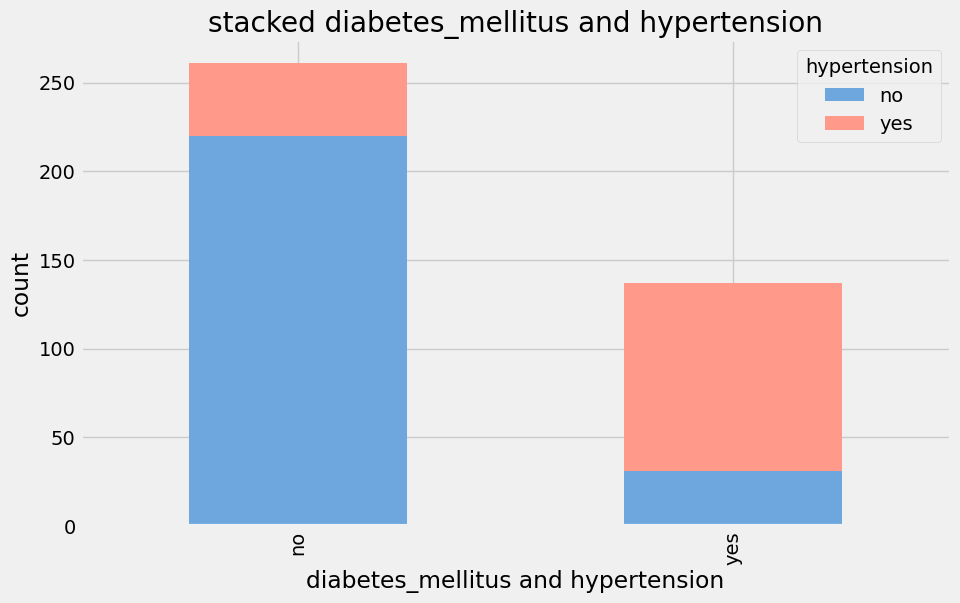

In [77]:
diabeter_hypertension = pd.crosstab(df['diabetes_mellitus'],df['hypertension'])
diabeter_hypertension.plot(kind='bar',stacked = True , color = ['#6DA7DE','#FF9A8B'],figsize = (10,6))

plt.xlabel('diabetes_mellitus and hypertension')
plt.ylabel('count')
plt.legend(title = 'hypertension')
plt.title('stacked diabetes_mellitus and hypertension')

In [78]:
#106 both hypertension and diabetes_mellitus and 31 is only having diabetes_mellitus not having
#chronic desease

In [79]:
def scatter(col1,col2):
    fig=px.scatter(df,x=col1,y=col2, color= 'classification',template = 'plotly_dark')
    return fig.show()


In [80]:
scatter('hemoglobin','packed_cell_volume')

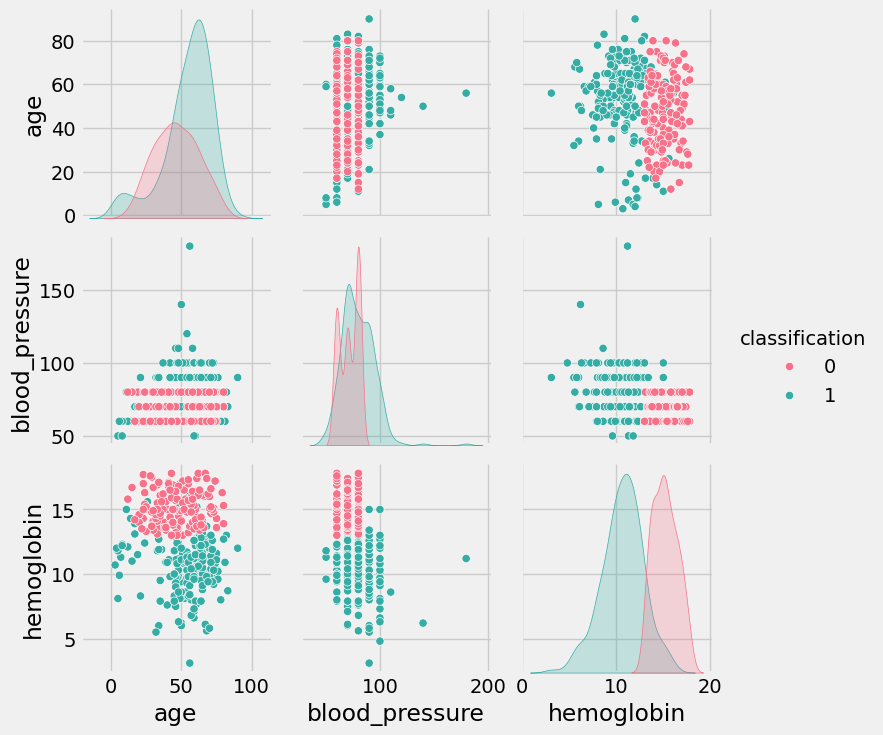

In [81]:
#multivariable analysis

selected_columns = [ 'age','blood_pressure','hemoglobin','classification']
sns.pairplot(df[selected_columns],hue='classification',palette='husl')

<Axes: >

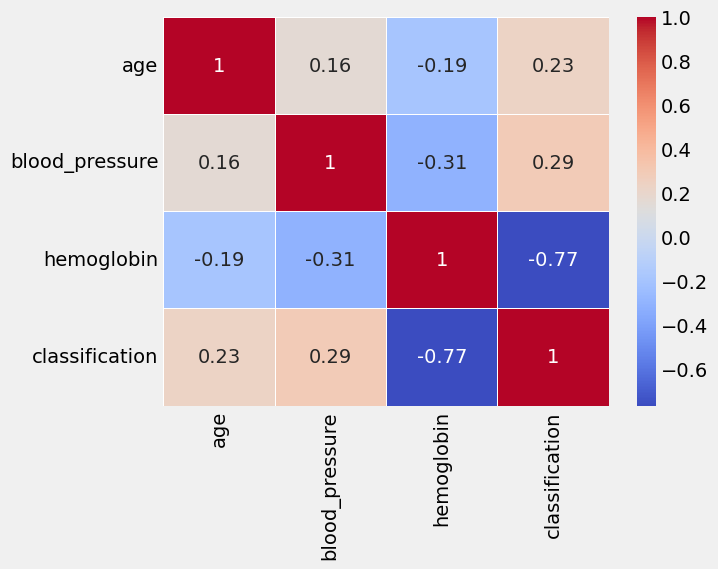

In [82]:
df[selected_columns].corr()
sns.heatmap(df[selected_columns].corr(),annot = True , cmap = 'coolwarm',linewidth=.5 )

In [83]:
import plotly.graph_objects as go

heatmap_data = df[selected_columns].corr()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
                                x=heatmap_data.columns,
                                y=heatmap_data.index,
                                colorscale='Viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()

In [84]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='hemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [86]:
for col in cat_col:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

classification has 2 categories



In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [88]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [89]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
classification               0
dtype: int64

In [90]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [91]:
for col in num_cols:
    random_value_imputation(col)

In [92]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [93]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 



In [96]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', n_estimators = 20)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 



In [97]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=51)

In [98]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=51)

In [99]:
SVC = classifier.score(X_test,y_test)
SVC


0.9416666666666667

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [101]:
KNN = classifier1.score(X_test, y_test)
KNN

0.6583333333333333

In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Perform k-fold cross-validation for Decision Tree Classifier
cv_scores = cross_val_score(dtc, X, y, cv=5)
print(f'Decision Tree Classifier K-fold scores: {cv_scores}')
dtc_kfold_avg = np.average(cv_scores)
print(f'Decision Tree Classifier K-fold Avg : {dtc_kfold_avg}')
print()

# Perform k-fold cross-validation for Random Forest
cv_scores_rf = cross_val_score(rd_clf, X, y, cv=5)
print(f'Random Forest Classifier K-fold scores: {cv_scores_rf}')
rd_clf_kfold_avg = np.average(cv_scores_rf)
print(f'Random Forest Classifier K-fold Avg : {rd_clf_kfold_avg}')
print()

# Perform k-fold cross-validation for SVC
cv_scores_svc = cross_val_score(classifier, X, y, cv=5)
print(f'SVC K-fold scores: {cv_scores_svc}')
svc_kfold_avg = np.average(cv_scores_svc)
print(f'SVC K-fold Avg : {svc_kfold_avg}')
print()

# Perform k-fold cross-validation for KNN
cv_scores_knn = cross_val_score(classifier1, X, y, cv=5)
print(f'KNN K-fold scores: {cv_scores_knn}')
knn_kfold_avg = np.average(cv_scores_knn)
print(f'KNN K-fold Avg : {knn_kfold_avg }')
print()

Decision Tree Classifier K-fold scores: [0.925  0.9375 0.9375 0.95   0.9625]
Decision Tree Classifier K-fold Avg : 0.9425000000000001

Random Forest Classifier K-fold scores: [1.     0.975  0.9625 0.975  1.    ]
Random Forest Classifier K-fold Avg : 0.9824999999999999

SVC K-fold scores: [0.9625 0.975  0.925  0.9625 0.9875]
SVC K-fold Avg : 0.9625

KNN K-fold scores: [0.575  0.6625 0.675  0.675  0.5875]
KNN K-fold Avg : 0.635



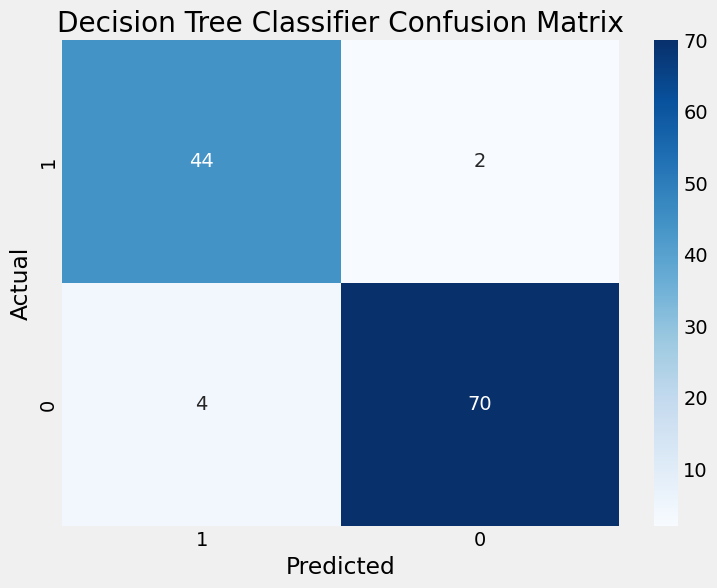

In [103]:
import matplotlib.pyplot as plt
# Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['classification'].unique(), yticklabels=df['classification'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()


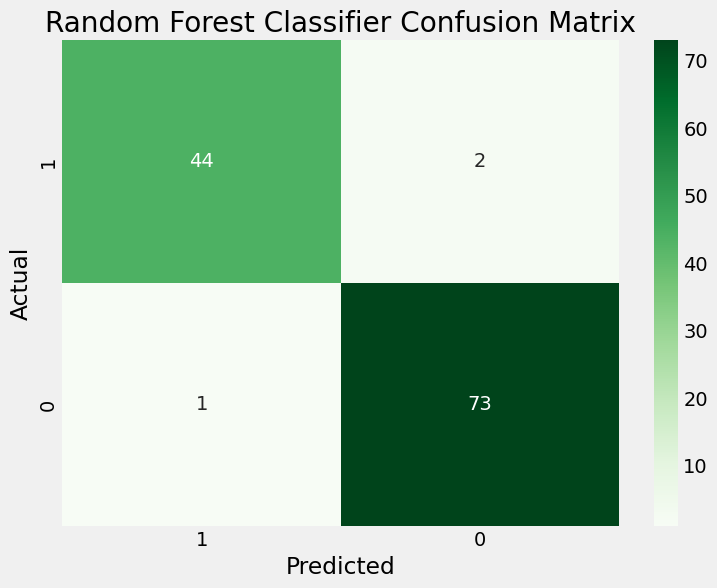

In [104]:
# Random Forest Classifier Confusion Matrix
rd_clf_cm = confusion_matrix(y_test, rd_clf.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(rd_clf_cm, annot=True, fmt="d", cmap="Greens", xticklabels=df['classification'].unique(), yticklabels=df['classification'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

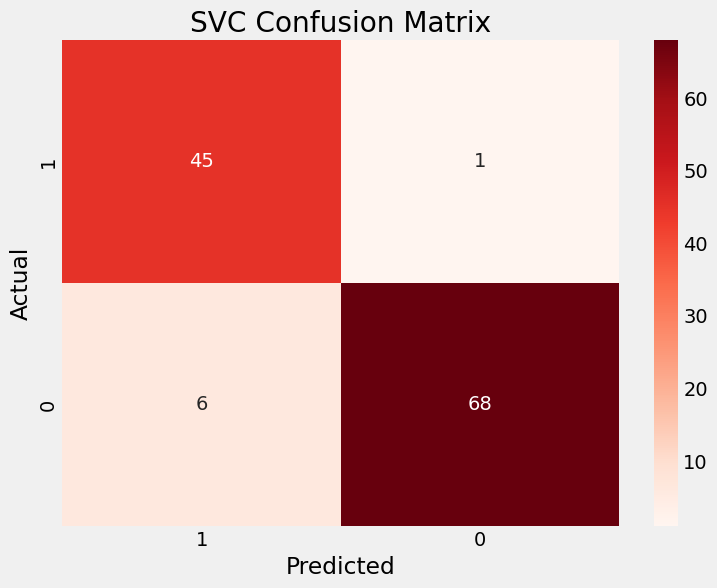

In [105]:
# SVC Confusion Matrix
svc_cm = confusion_matrix(y_test, classifier.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Reds", xticklabels=df['classification'].unique(), yticklabels=df['classification'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVC Confusion Matrix")
plt.show()

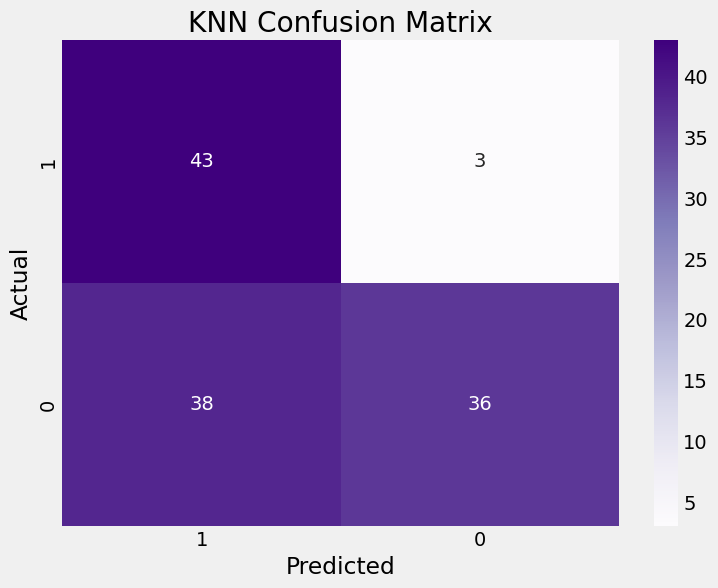

In [106]:
# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, classifier1.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['classification'].unique(), yticklabels=df['classification'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [107]:
import pandas as pd
# precision
dtc_precision = precision_score(y_test, dtc.predict(X_test))
rd_clf_precision = precision_score(y_test, rd_clf.predict(X_test))
svc_precision = precision_score(y_test, classifier.predict(X_test))
knn_precision = precision_score(y_test, classifier1.predict(X_test))

#false positive rate
dtc_fpr = 1 - dtc_precision
rd_clf_fpr = 1 - rd_clf_precision
svc_fpr = 1 - svc_precision
knn_fpr = 1 - knn_precision

In [108]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier','Support Vector Machines','K-Nerest Neighbour'],
    'Acuuracy Score' : [dtc_acc, rd_clf_acc,SVC,KNN],
    'K-Fold Average' : [dtc_kfold_avg, rd_clf_kfold_avg, svc_kfold_avg, knn_kfold_avg],
    'Precison Value' : [dtc_precision, rd_clf_precision, svc_precision, knn_precision],
    'False Prediction Rate' : [dtc_fpr, rd_clf_fpr, svc_fpr, knn_fpr]
})

models.sort_values(by = 'Acuuracy Score', ascending = False)

,Model,Acuuracy Score,K-Fold Average,Precison Value,False Prediction Rate
1,Random Forest Classifier,0.975000,0.9825,0.973333,0.026667
0,Decision Tree Classifier,0.950000,0.9425,0.972222,0.027778
2,Support Vector Machines,0.941667,0.9625,0.985507,0.014493
3,K-Nerest Neighbour,0.658333,0.6350,0.923077,0.076923
